In [38]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [8]:
# Create a set of random lattiude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

610

In [11]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a813e76f76df21f01c564361afe75dd


In [13]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("city not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | hansi
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | caiaponia
Processing Record 8 of Set 1 | englewood
Processing Record 9 of Set 1 | saint-georges
Processing Record 10 of Set 1 | sentyabrskiy
city not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | mabaruma
Processing Record 17 of Set 1 | angoche
Processing Record 18 of Set 1 | aksu
Processing Record 19 of Set 1 | lubbock
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | molteno
Processing Record 22 of Set 1 | nogent-le-rotrou
Processi

Processing Record 39 of Set 4 | acapulco
Processing Record 40 of Set 4 | seoul
Processing Record 41 of Set 4 | barentsburg
city not found. Skipping...
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | santa luzia
Processing Record 44 of Set 4 | peterongan
Processing Record 45 of Set 4 | sola
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | acari
Processing Record 50 of Set 4 | chame
Processing Record 1 of Set 5 | kaeo
Processing Record 2 of Set 5 | mongo
Processing Record 3 of Set 5 | rodrigues alves
Processing Record 4 of Set 5 | atherton
Processing Record 5 of Set 5 | sinnamary
Processing Record 6 of Set 5 | copiapo
Processing Record 7 of Set 5 | nishihara
Processing Record 8 of Set 5 | wahran
city not found. Skipping...
Processing Record 9 of Set 5 | guilin
Processing Record 10 of Set 5 | konstantinovsk
Processing Record 11 of Set 5 | sadove
Processing Record 1

Processing Record 31 of Set 8 | walvis bay
Processing Record 32 of Set 8 | da nang
Processing Record 33 of Set 8 | gaoua
Processing Record 34 of Set 8 | amot
Processing Record 35 of Set 8 | payakumbuh
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | dubbo
Processing Record 38 of Set 8 | duartina
Processing Record 39 of Set 8 | contai
Processing Record 40 of Set 8 | luau
Processing Record 41 of Set 8 | bambous virieux
Processing Record 42 of Set 8 | leh
Processing Record 43 of Set 8 | kashan
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | coahuayana
Processing Record 46 of Set 8 | suffolk
Processing Record 47 of Set 8 | meulaboh
Processing Record 48 of Set 8 | conceicao da barra
Processing Record 49 of Set 8 | slave lake
Processing Record 50 of Set 8 | kayerkan
Processing Record 1 of Set 9 | mugur-aksy
Processing Record 2 of Set 9 | samarai
Processing Record 3 of Set 9 | te anau
Processing Record 4 of Set 9 | umzimvubu
city not found. Ski

Processing Record 22 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 12 | hay river
Processing Record 24 of Set 12 | tobane
Processing Record 25 of Set 12 | alofi
Processing Record 26 of Set 12 | salekhard
Processing Record 27 of Set 12 | la macarena
Processing Record 28 of Set 12 | kastamonu
Processing Record 29 of Set 12 | neyshabur
Processing Record 30 of Set 12 | gerede
Processing Record 31 of Set 12 | kingsland
Processing Record 32 of Set 12 | teterow
Processing Record 33 of Set 12 | los llanos de aridane
Processing Record 34 of Set 12 | port lincoln
Processing Record 35 of Set 12 | katangli
Processing Record 36 of Set 12 | acarau
Processing Record 37 of Set 12 | zachagansk
city not found. Skipping...
Processing Record 38 of Set 12 | sambava
Processing Record 39 of Set 12 | ahipara
Processing Record 40 of Set 12 | rabat
Processing Record 41 of Set 12 | tingrela
city not found. Skipping...
Processing Record 42 of Set 12 | kandrian
Processing Record 43 of Set 12 | 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,80.60,65,20,9.17,US,2020-02-24 03:39:01
1,Hansi,29.10,75.97,63.72,57,20,3.18,IN,2020-02-24 03:39:01
2,Castro,-24.79,-50.01,57.61,94,100,8.41,BR,2020-02-24 03:39:01
3,Fortuna,40.60,-124.16,50.00,93,90,6.93,US,2020-02-24 03:39:01
4,Severo-Kurilsk,50.68,156.12,26.60,96,100,34.47,RU,2020-02-24 03:39:02


In [16]:
# Re Order the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-02-24 03:39:01,22.08,-159.32,80.60,65,20,9.17
1,Hansi,IN,2020-02-24 03:39:01,29.10,75.97,63.72,57,20,3.18
2,Castro,BR,2020-02-24 03:39:01,-24.79,-50.01,57.61,94,100,8.41
3,Fortuna,US,2020-02-24 03:39:01,40.60,-124.16,50.00,93,90,6.93
4,Severo-Kurilsk,RU,2020-02-24 03:39:02,50.68,156.12,26.60,96,100,34.47


In [18]:
# Creat the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

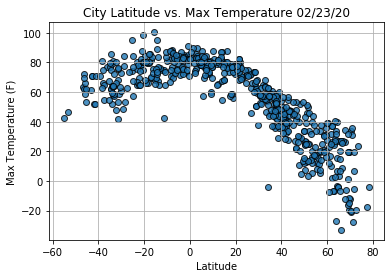

In [23]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

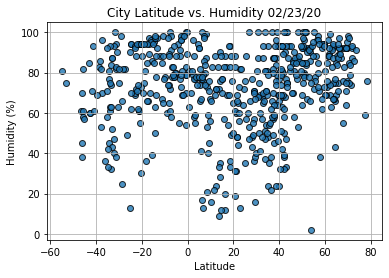

In [24]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

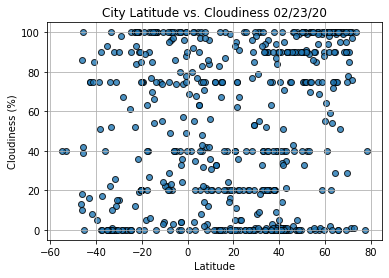

In [25]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

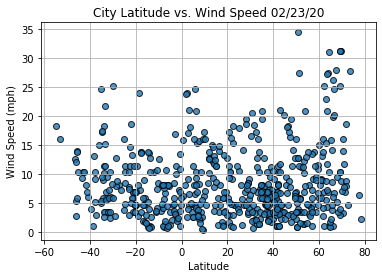

In [26]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [43]:
# Create a function to perform linear regression on the weather data and 
# plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

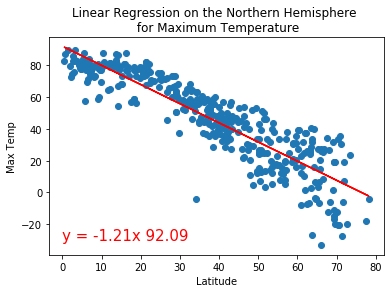

In [45]:
# Linear regression pf Max Temp vs. Latitude on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (0,-30))

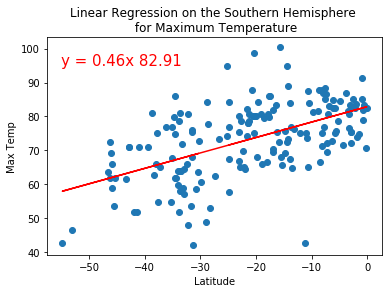

In [49]:
# Linear regression of Max Temp vs Latitude on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-55,95))

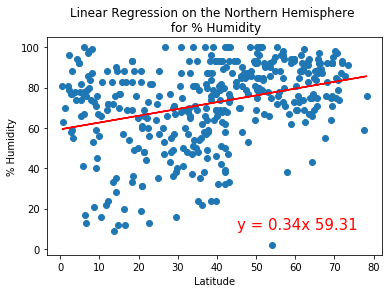

In [55]:
# Linear regression of Humidity vs Latitude on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45,10))

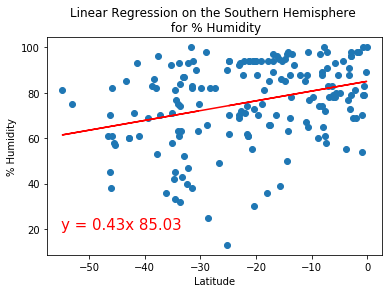

In [58]:
# Linear regression of Humidity vs Latitude on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55,20))

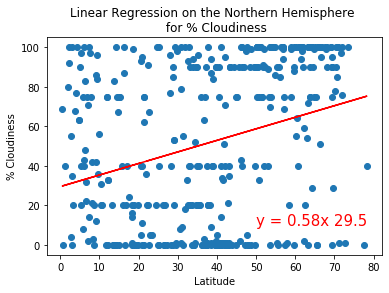

In [60]:
# Linear regression of % Cloudiness vs Latitude on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (50,10))

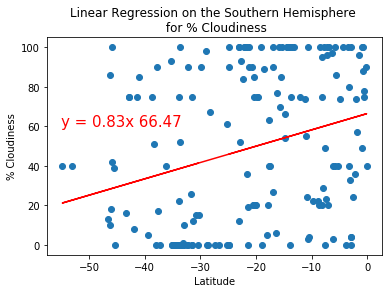

In [62]:
# Linear regression of % Cloudiness vs Latitude on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-55,60))

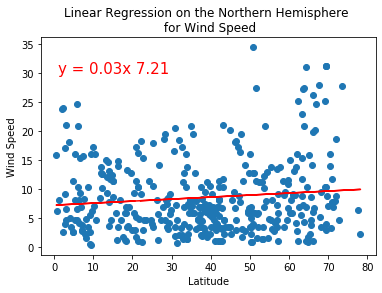

In [65]:
# Linear regression of Wind Speed vs Latitude on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (1,30))

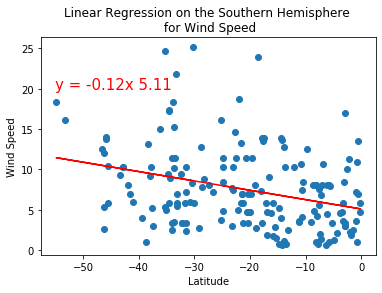

In [68]:
# Linear regression of Wind Speed vs Latitude on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-55,20))